###  Use completed data to further cleaning

In [47]:
import pandas as pd
import numpy as np
import string

In [48]:
import re
def get_vessel_info(string,pattern,n):
    result = re.search(pattern,string)
    if result:
        return result.group(n)
    return ''

In [49]:
#using the manually filled excel sheet, cause there're 7 vessels missing.
s2 = 'test_completed.csv'
printable = set(string.printable)
filter(lambda x: x in printable,s2)
df_complete = pd.read_csv(s2)
df_complete = df_complete[['Number','Year','name','Type','country','routes']]
df_complete.head(15)

,Number,Year,name,Type,country,routes
0,1,1903-06,GjÃ¸a,21 m auxiliary sloop,Norway,West 4
1,2,1940-42,St Roch1,29Â·7 m auxiliary schooner,Canada,East 6
2,3,1944,St Roch2,29Â·7 m auxiliary schooner,Canada,West 2
3,4,1954,HMCS Labrador,icebreaker,Canada,West 2
4,5,1957,USCGC Bramble,buoy tender,United States,East 6
5,6,1957,USCGC Spar,buoy tender,United States,East 6
6,7,1957,USCGC Storis,icebreaker,United States,East 6
7,8,1967,CCGS John A. McDonald,icebreaker,Canada,West 3
8,9,1969,USCGC Northwind1,icebreaker,United States,East 5
9,10,1969,USCGC Northwind2,icebreaker,United States,West 3


#### Extract length& Width info

In [50]:
df_complete.loc[:,'Length'] = df_complete['Type'].apply(lambda x: get_vessel_info(x,pattern='(([0-9]{1,3})(.{1,4}[0-9]+)*)',n=2))
df_complete.loc[:,'Length'].head(20)

0     21
1     29
2     29
3       
4       
5       
6       
7       
8       
9       
10      
11      
12      
13      
14      
15      
16      
17    13
18      
19    10
Name: Length, dtype: object

In [51]:
df_complete.loc[:,'Width'] = df_complete['Type'].apply(lambda x: get_vessel_info(x,pattern='(([0-9]{1,3})(.{1,4}([0-9]+))*)',n=4))
df_complete

,Number,Year,name,Type,country,routes,Length,Width
0,1,1903-06,GjÃ¸a,21 m auxiliary sloop,Norway,West 4,21,None
1,2,1940-42,St Roch1,29Â·7 m auxiliary schooner,Canada,East 6,29,7
2,3,1944,St Roch2,29Â·7 m auxiliary schooner,Canada,West 2,29,7
3,4,1954,HMCS Labrador,icebreaker,Canada,West 2,,
4,5,1957,USCGC Bramble,buoy tender,United States,East 6,,
5,6,1957,USCGC Spar,buoy tender,United States,East 6,,
6,7,1957,USCGC Storis,icebreaker,United States,East 6,,
7,8,1967,CCGS John A. McDonald,icebreaker,Canada,West 3,,
8,9,1969,USCGC Northwind1,icebreaker,United States,East 5,,
9,10,1969,USCGC Northwind2,icebreaker,United States,West 3,,


#### Remove the number following the vessel name if there's any

In [52]:
#find out the number
df_complete['Number_of_transit'] = df_complete['name'].apply(lambda x: get_vessel_info(x,pattern='[1-9]+',n=0))
df_complete['Number_of_transit'][-45:-30]

242      
243      
244    18
245     2
246      
247      
248      
249     6
250      
251      
252      
253      
254      
255      
256      
Name: Number_of_transit, dtype: object

In [53]:
df_complete['Length_to_drop'] = [len(x) for x in df_complete['Number_of_transit']]
df_complete['Length_to_drop'][-45:-30]

242    0
243    0
244    2
245    1
246    0
247    0
248    0
249    1
250    0
251    0
252    0
253    0
254    0
255    0
256    0
Name: Length_to_drop, dtype: int64

In [54]:
#make a small correction
df_complete.iloc[142,:]

Number                               143
Year                                2010
name                                  T6
Type                 48Â·5 m motor yacht
country                           Cayman
routes                            West 3
Length                                48
Width                                  5
Number_of_transit                      6
Length_to_drop                         1
Name: 142, dtype: object

In [55]:
df_complete.loc[142,'Length_to_drop']=0

In [56]:
df_complete.head()

,Number,Year,name,Type,country,routes,Length,Width,Number_of_transit,Length_to_drop
0,1,1903-06,GjÃ¸a,21 m auxiliary sloop,Norway,West 4,21,None,,0
1,2,1940-42,St Roch1,29Â·7 m auxiliary schooner,Canada,East 6,29,7,1,1
2,3,1944,St Roch2,29Â·7 m auxiliary schooner,Canada,West 2,29,7,2,1
3,4,1954,HMCS Labrador,icebreaker,Canada,West 2,,,,0
4,5,1957,USCGC Bramble,buoy tender,United States,East 6,,,,0


##### try do something to a column based on the value of another column!!!

In [57]:
result = df_complete.apply(lambda x: x['name'][:(len(x['name']) - x['Length_to_drop'])],axis = 1)
result

0                         GjÃ¸a
1                       St Roch
2                       St Roch
3                 HMCS Labrador
4                 USCGC Bramble
5                    USCGC Spar
6                  USCGC Storis
7         CCGS John A. McDonald
8               USCGC Northwind
9               USCGC Northwind
10          USCGC Staten Island
11                   CSS Baffin
12                   CSS Hudson
13                   Pandora II
14                        Theta
15                 CSS Skidgate
16           CCGS J. E. Bernier
17                     Williwaw
18         CCGS Pierre Radisson
19             J. E. Bernier II
20              Canmar Kigoriak
21     CCGS Louis S. St Laurent
22           CCGS J. E. Bernier
23                   Pandora II
24                   CSS Hudson
25                      Mermaid
26                 Arctic Shiko
27                 Polar Circle
28            Lindblad Explorer
29              USCGC Polar Sea
                 ...           
257     

In [58]:
df_complete['name'] = result
df_complete.head()

,Number,Year,name,Type,country,routes,Length,Width,Number_of_transit,Length_to_drop
0,1,1903-06,GjÃ¸a,21 m auxiliary sloop,Norway,West 4,21,None,,0
1,2,1940-42,St Roch,29Â·7 m auxiliary schooner,Canada,East 6,29,7,1,1
2,3,1944,St Roch,29Â·7 m auxiliary schooner,Canada,West 2,29,7,2,1
3,4,1954,HMCS Labrador,icebreaker,Canada,West 2,,,,0
4,5,1957,USCGC Bramble,buoy tender,United States,East 6,,,,0


##### method 2 extrac the subset first. 
#find all the items need a certain operation
temp = df_complete.loc[df_complete['Length_to_drop'] != 0,['name','Length_to_drop']]
temp.tail()

#x.apply(lambda x: x['name'][:x['digit']], axis=1) example
result = temp.apply(lambda x: x['name'][:-x['Length_to_drop']],axis = 1)
result

temp['name'] = result
temp.head()

In [59]:
df_complete.to_csv('Vessels_name_size_result_of_step2.csv')

### Data Visulisation 

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df_complete['routes_num'] = [np.NaN if x[-1]=='p' else float(x[-1])  for x in df_complete['routes']] #or maybe we don't need it .
df_complete.groupby('routes')['name'].count()

routes
East  2     4
East  3    29
East  4    11
East  5    36
East  6    41
East  7     7
East 6      1
East cp     1
West 1      3
West 2     13
West 3     40
West 4     45
West 5     21
West 6     33
West 7      1
West cp     1
Name: name, dtype: int64

In [62]:
#
#df_complete['routes_num'].hist(figsize=(20,10))

Text(0.5,1,'Number of Transits by Routes')

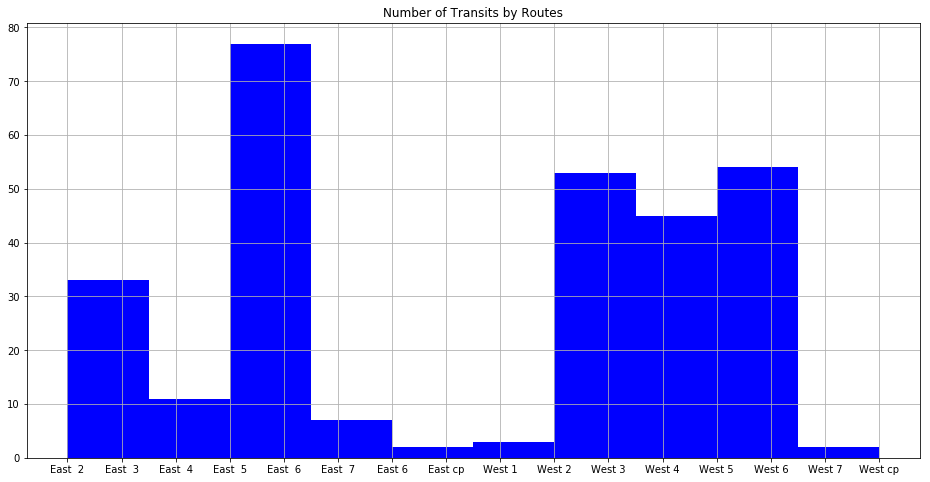

In [96]:
#the popularity of each route.
df_complete['routes'].hist(figsize=(16,8),color ='blue')
plt.title('Number of Transits by Routes')

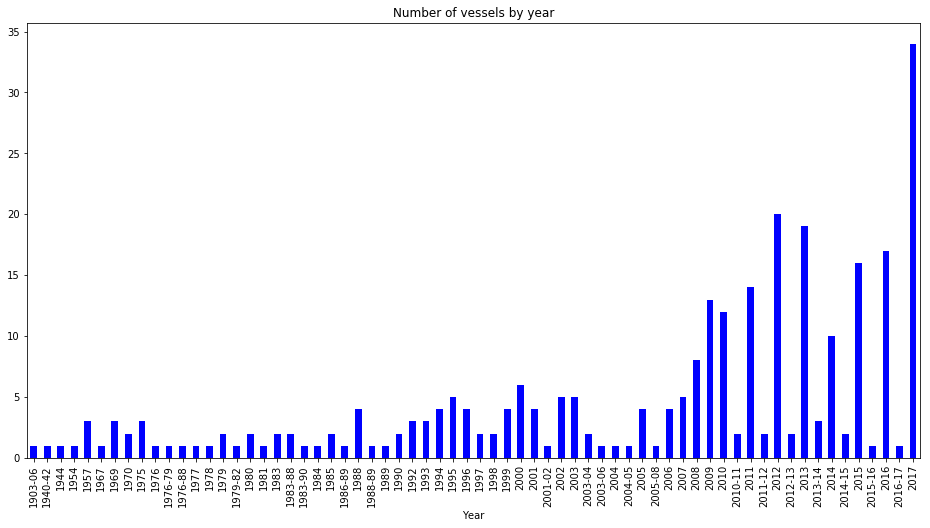

In [89]:
df_complete.groupby('Year')['name'].count().plot(figsize=(16,8),kind='bar',title = 'Number of vessels by year',color='blue')

In [ ]:
'Z:\03B_PORT,CANAL,ROUTES\50_Northwest Passage\Statistic'

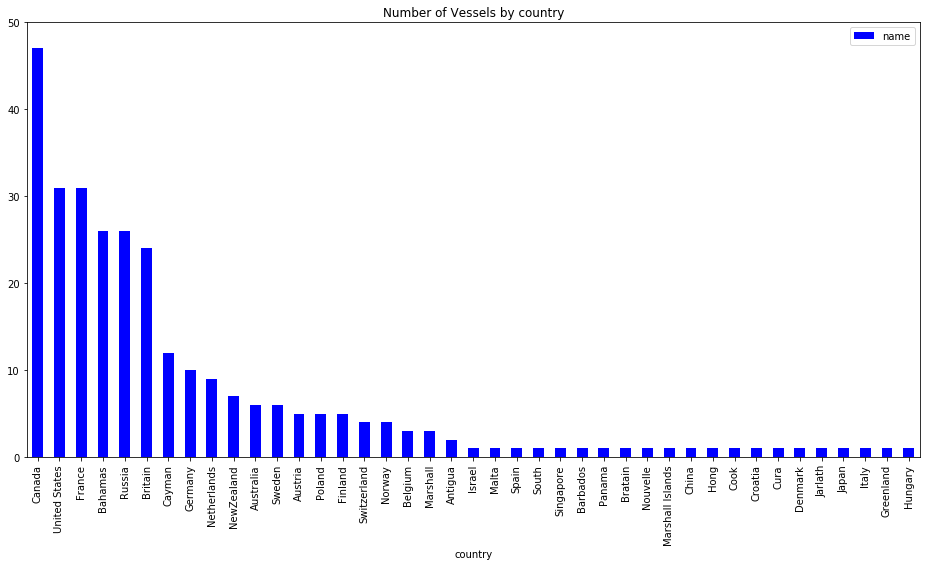

In [92]:
df_complete.groupby('country')['name'].count().sort_values(ascending = False).to_frame().plot(kind = 'bar',figsize=(16,8),title = 'Number of Vessels by country',ylim=(0,50),color='blue')